# Exploratory Analysis

import libraries we are gonna use and define functions for plotting by matplotlib. 

In [28]:
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import numpy as np # linear algebra
import pandas as pd # data processing, csv file I/O (read and write)
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pylab as pl

In [7]:
# import data
df = pd.read_csv('employee_reviews.csv', delimiter = ',', index_col = 0)
df.FataFrame = 'employee_reviews.csv'

In [9]:
# show the head of the data
df.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [10]:
# data description
df.describe()

,overall-ratings,helpful-count
count,67529.000000,67529.000000
mean,3.826075,1.268211
std,1.154989,16.085852
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,1.000000
max,5.000000,2094.000000


In [13]:
# dropping colums
df.drop(columns = ['location','dates', 'link','advice-to-mgmt','summary','helpful-count','job-title'], inplace = True)

In [15]:
# renaming columns
df.rename(columns={'overall-ratings':'overall', 'work-balance-stars':'workBalance', 'culture-values-stars':'cultureValue', 'carrer-opportunities-stars':'opportunities', 'senior-mangemnet-stars':'management','comp-benefit-stars':'benefits'}, inplace=True)

In [20]:
# data transformations
df['workBalance'] = np.where(df['workBalance']=='none', 0, df['workBalance'])
df['cultureValue'] = np.where(df['cultureValue']=='none', 0, df['cultureValue'])
df['opportunities'] = np.where(df['opportunities']=='none', 0, df['opportunities'])
df['benefits'] = np.where(df['benefits']=='none', 0, df['benefits'])
df['management'] = np.where(df['management']=='none', 0, df['management'])
df['workBalance'] = pd.to_numeric(df['workBalance'])
df['cultureValue'] = pd.to_numeric(df['cultureValue'])
df['opportunities'] = pd.to_numeric(df['opportunities'])
df['benefits'] = pd.to_numeric(df['benefits'])
df['management'] = pd.to_numeric(df['management'])


In [24]:
# data desciption after dropping unrelated columns and transformations
df.describe

<bound method NDFrame.describe of          company                                               pros  \
1         google                      People are smart and friendly   
2         google  1) Food, food, food. 15+ cafes on main campus ...   
3         google  * If you're a software engineer, you're among ...   
4         google  You can't find a more well-regarded company th...   
5         google  Google is a world of its own. At every other c...   
6         google  People are not that busy, so they are nice to ...   
7         google  Great working environment. Good work life balance   
8         google            work culture, benefits, growth, people,   
9         google  Great products. Vision you can feel good about...   
10        google             Impact driven. Best tech in the world.   
11        google  * Smart people * World class infrastructure * ...   
12        google  * There is endless opportunity * You'll never ...   
13        google  Atmosphere that promotes 

In [25]:
# head of data after dropping unrelated columns and transformations
df.head()

,company,pros,cons,overall,workBalance,cultureValue,opportunities,benefits,management
1,google,People are smart and friendly,Bureaucracy is slowing things down,5.0,4.0,5.0,5.0,4.0,5.0
2,google,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4.0,2.0,3.0,3.0,5.0,3.0
3,google,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",5.0,5.0,4.0,5.0,5.0,4.0
4,google,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,5.0,2.0,5.0,5.0,4.0,5.0
5,google,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",5.0,5.0,5.0,5.0,5.0,5.0


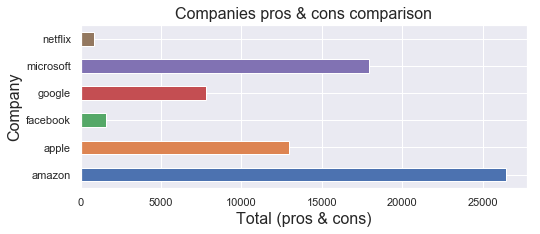

In [39]:
# comparison of total count of pros/cons based on different companies
sns.set(context = 'notebook')
pl.figure(figsize = (8,3))
df.groupby(['company']).pros.count().plot('barh')
#df.groupby(['company'].pros.count().plot('barh'))
pl.ylabel('Company', fontsize = 16)
pl.xlabel('Total (pros & cons)', fontsize = 16)
pl.title('Companies pros & cons comparison', fontsize = 16)
pl.show()

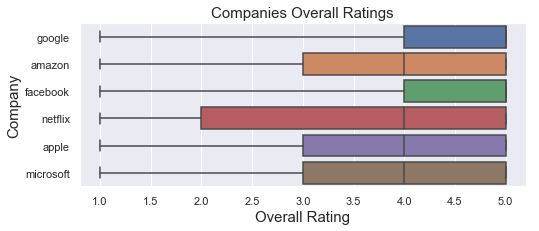

In [45]:
# Companies Overall Ratings
pl.figure(figsize =(8,3))
sns.boxplot(x="overall", y="company", data=df, whis="range")
pl.xlabel('Overall Rating', fontsize=15)
pl.ylabel('Company', fontsize=15)
pl.title('Companies Overall Ratings', fontsize=15)
pl.show()

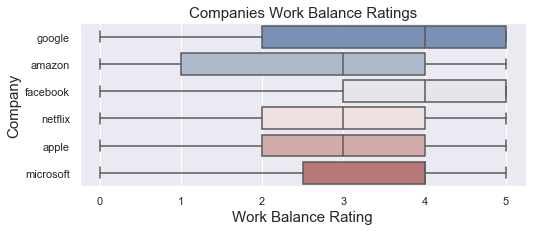

In [47]:
# Companies Work Balance Ratings
pl.figure(figsize =(8,3))
sns.boxplot(x="workBalance", y="company", data=df, whis="range", palette="vlag")
pl.xlabel('Work Balance Rating', fontsize=15)
pl.ylabel('Company', fontsize=15)
pl.title('Companies Work Balance Ratings', fontsize=15)
pl.show()

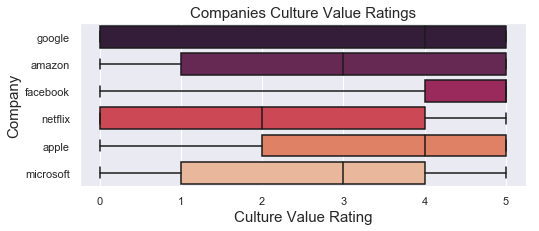

In [50]:
# Companies Culture Value Ratings
pl.figure(figsize =(8,3))
sns.boxplot(x="cultureValue", y="company", data=df, whis="range", palette="rocket")
pl.xlabel('Culture Value Rating', fontsize=15)
pl.ylabel('Company', fontsize=15)
pl.title('Companies Culture Value Ratings', fontsize=15)
pl.show()

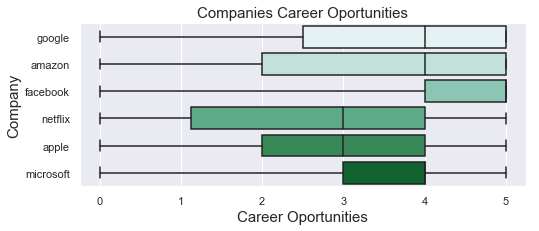

In [58]:
# Companies Career Opportunities Ratings
pl.figure(figsize =(8,3))
sns.boxplot(x="opportunities", y="company", data=df, whis="range", palette="BuGn")
pl.xlabel('Career Oportunities', fontsize=15)
pl.ylabel('Company', fontsize=15)
pl.title('Companies Career Oportunities', fontsize=15)
pl.show()

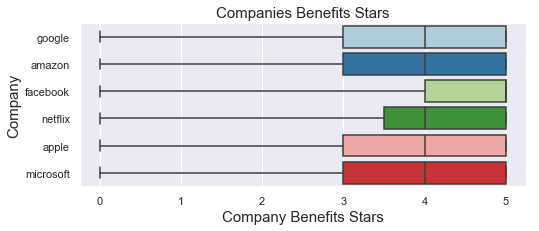

In [63]:
# Companies Benifit Stars
pl.figure(figsize =(8,3))
sns.boxplot(x="benefits", y="company", data=df, whis="range", palette="Paired")
pl.xlabel('Company Benefits Stars', fontsize=15)
pl.ylabel('Company', fontsize=15)
pl.title('Companies Benefits Stars', fontsize=15)
pl.show()

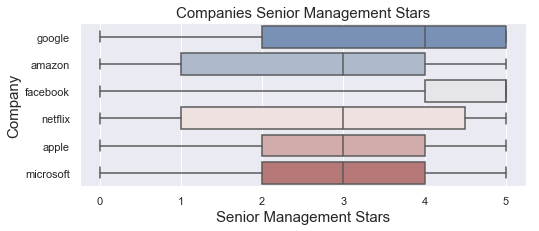

In [66]:
# Companies Senior Management Stars
pl.figure(figsize =(8,3))
sns.boxplot(x="management", y="company", data=df, whis="range", palette="vlag")
pl.xlabel('Senior Management Stars', fontsize=15)
pl.ylabel('Company', fontsize=15)
pl.title('Companies Senior Management Stars', fontsize=15)
pl.show()